In [56]:
import pandas as pd
df = pd.read_csv("Wholesale Customers data.csv")

In [57]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [58]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [59]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [60]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [61]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [62]:
#Exploratory Data Analysis

In [63]:
df1 = df[df.isna().any(axis=1)]
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


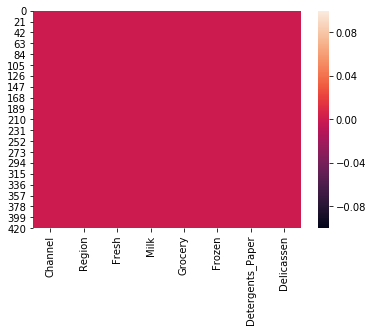

In [64]:
import seaborn as sns
sns.heatmap(df.isnull())

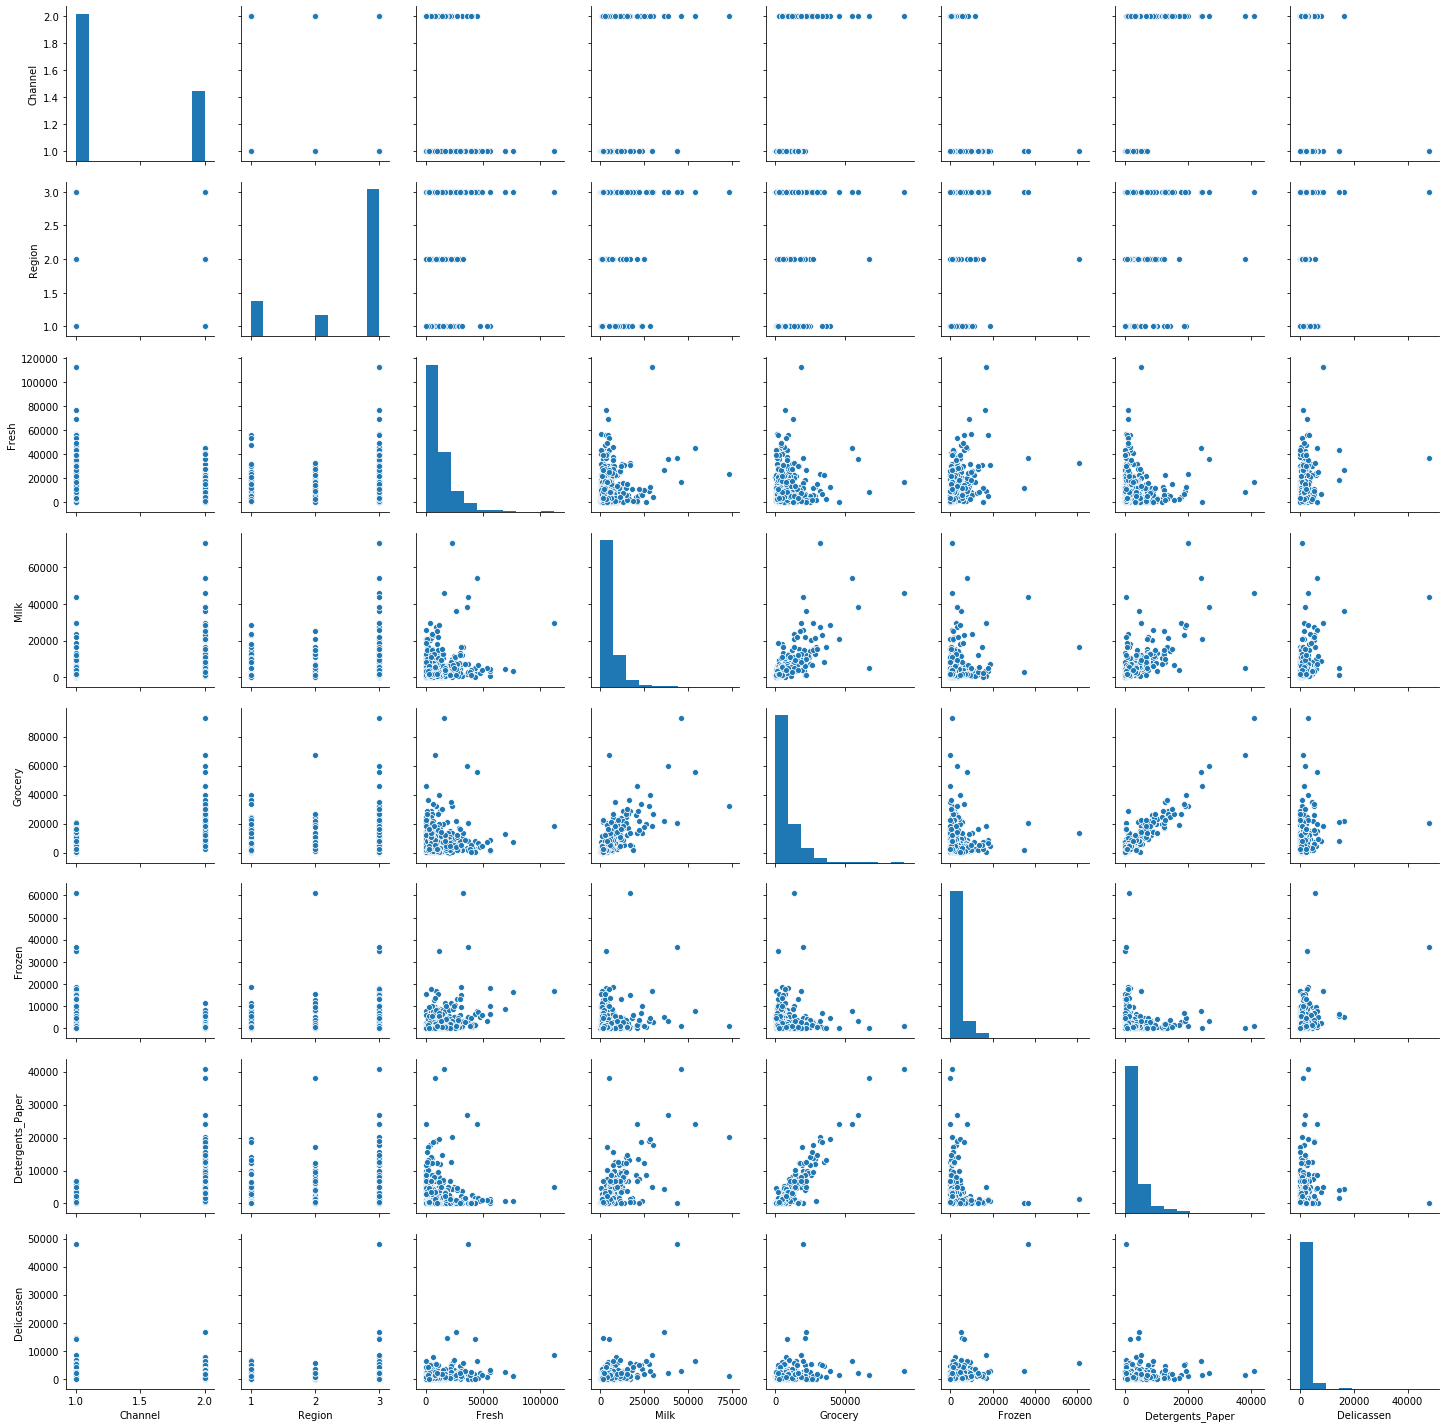

In [65]:
sns.pairplot(df)

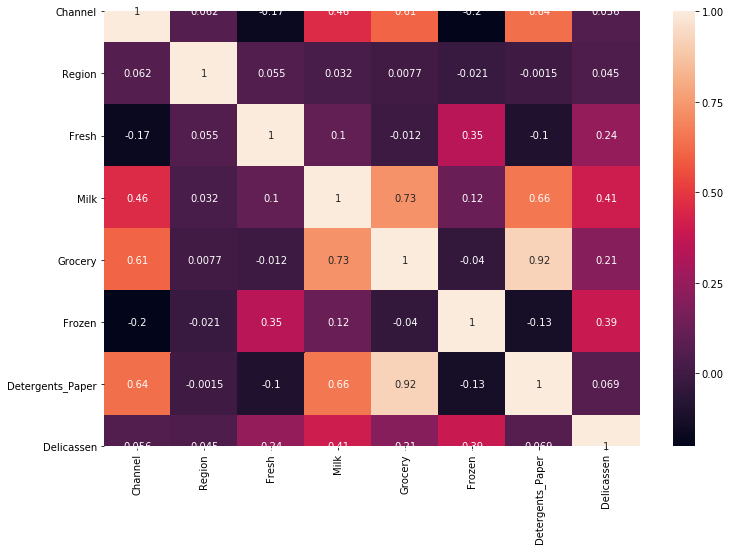

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<function matplotlib.pyplot.legend(*args, **kwargs)>

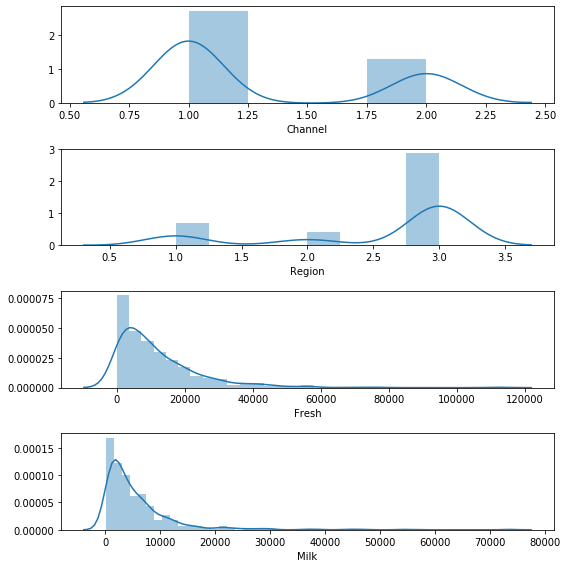

In [67]:

fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(8,8))
sns.distplot(df['Channel'],ax=ax1)
sns.distplot(df['Region'],ax=ax2)
sns.distplot(df['Fresh'],ax=ax3)
sns.distplot(df['Milk'],ax=ax4)
plt.tight_layout()
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

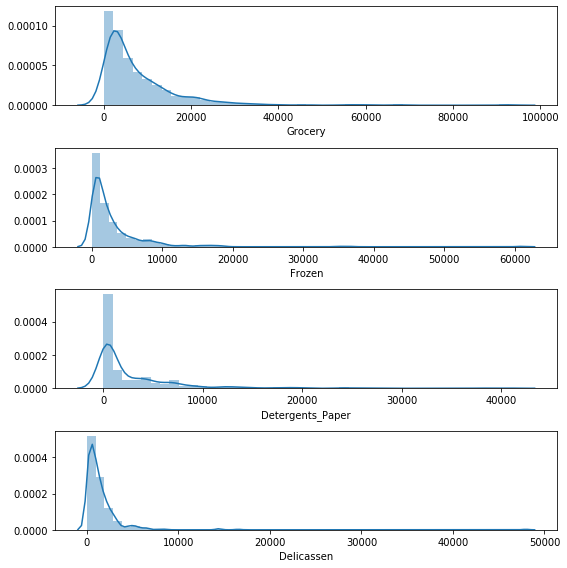

In [68]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(8,8))
sns.distplot(df['Grocery'],ax=ax1)
sns.distplot(df['Frozen'],ax=ax2)
sns.distplot(df['Detergents_Paper'],ax=ax3)
sns.distplot(df['Delicassen'],ax=ax4)
plt.tight_layout()
plt.legend

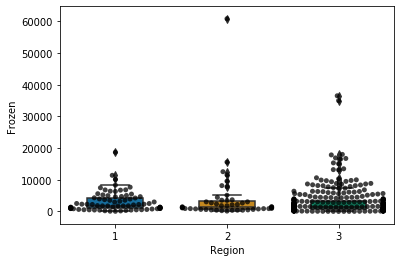

In [69]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='Frozen', x='Region', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='Frozen', x='Region',
              data=df, 
              color='black',
              alpha=0.75)

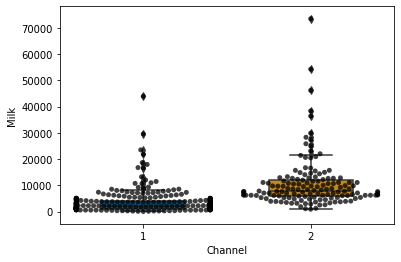

In [70]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='Milk', x='Channel', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='Milk', x='Channel',
              data=df, 
              color='black',
              alpha=0.75)

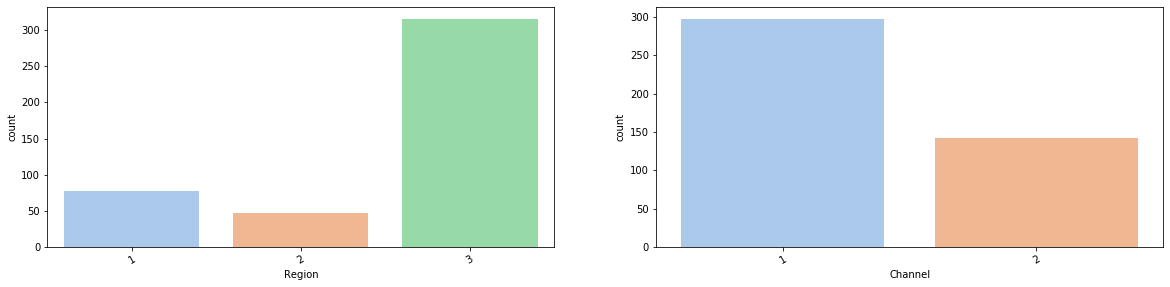

In [71]:
fig=plt.figure(figsize=(20,15))
axes=320
for cat in ['Region','Channel']:
    axes+=1
    fig.add_subplot(axes)
    sns.countplot(data=df,x=cat,palette='pastel')
    plt.xticks(rotation=30)
plt.show()

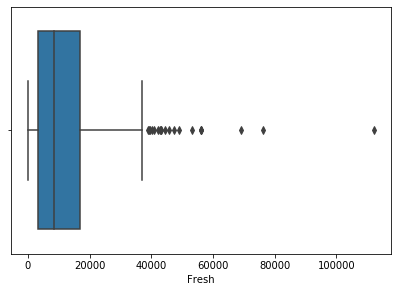

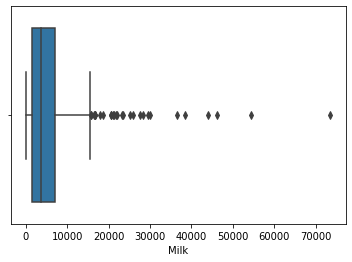

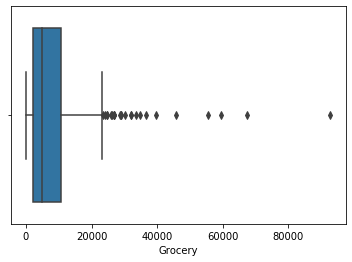

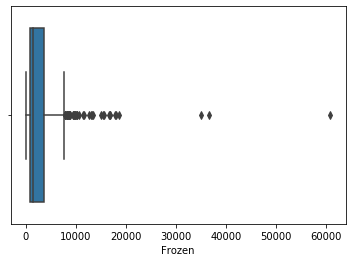

In [72]:
fig=plt.figure(figsize=(15,10))
axes=220
for num in ['Fresh','Milk','Grocery','Frozen']:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=df,x=num)
    plt.show()

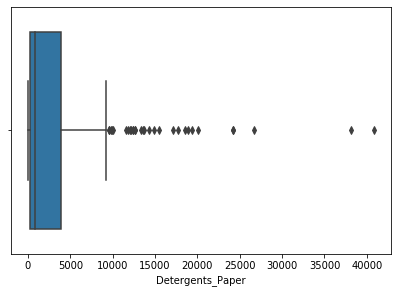

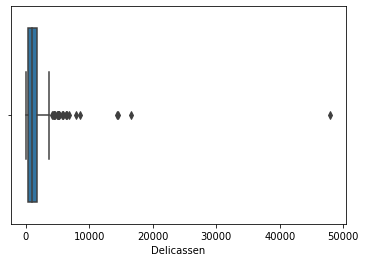

In [73]:

fig=plt.figure(figsize=(15,10))
axes=220
for num in ['Detergents_Paper','Delicassen']:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=df,x=num)
    plt.show()

# PCA

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [88]:
scaled_data = scaler.transform(df)

In [89]:
scaled_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [91]:
x_pca = pca.transform(scaled_data)

In [92]:
scaled_data.shape

(440, 8)

In [93]:
x_pca.shape

(440, 2)

Text(0, 0.5, 'Second Principal Component')

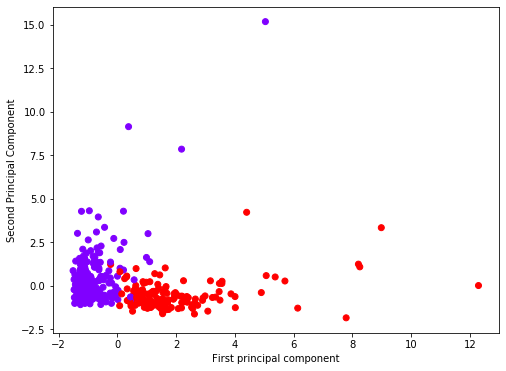

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Channel'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [99]:
pca.explained_variance_ratio_

array([0.38750123, 0.22374588])

# KNN Clustering:

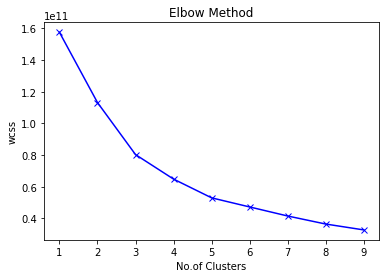

In [107]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss,'bx-')
plt.xlabel('No.of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

In [108]:
from mpl_toolkits.mplot3d import Axes3D

K-Means


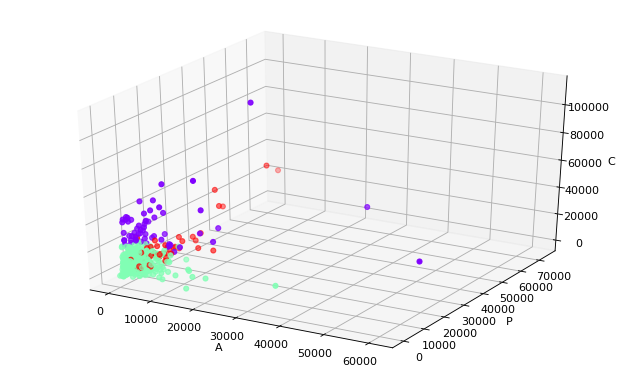

In [109]:
model=KMeans(n_clusters=3,init='k-means++', random_state=42)
model.fit(df)
kmeans_labels=model.labels_

fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes(projection="3d")
ax.scatter3D(df.Frozen,df.Milk,df.Fresh,c=kmeans_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
zLabel=ax.set_zlabel('C',linespacing=0.5)
print("K-Means")

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

K-Means


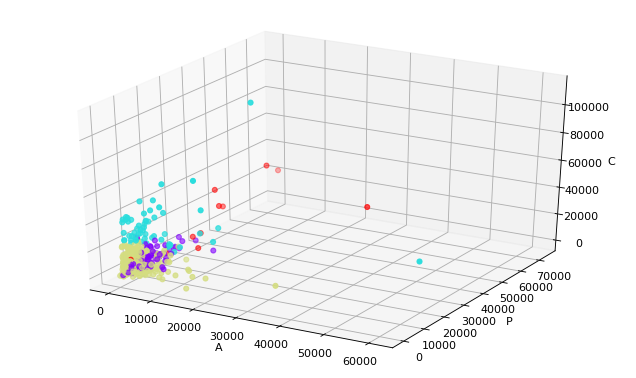

In [115]:
model=KMeans(n_clusters=4,init='k-means++', random_state=42)
model.fit(df)
kmeans_labels=model.labels_

fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes(projection="3d")
ax.scatter3D(df.Frozen,df.Milk,df.Fresh,c=kmeans_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
zLabel=ax.set_zlabel('C',linespacing=0.5)
print("K-Means")

In [116]:
import scipy.cluster.hierarchy as sch

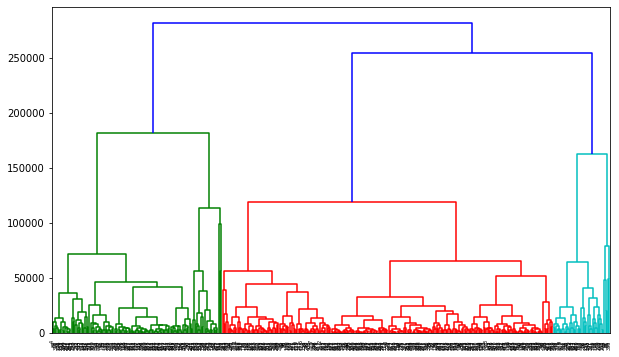

In [117]:
plt.figure(figsize=(10,6))
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))

In [118]:
from sklearn.cluster import AgglomerativeClustering

Hierarchical Agglomerative Clustering


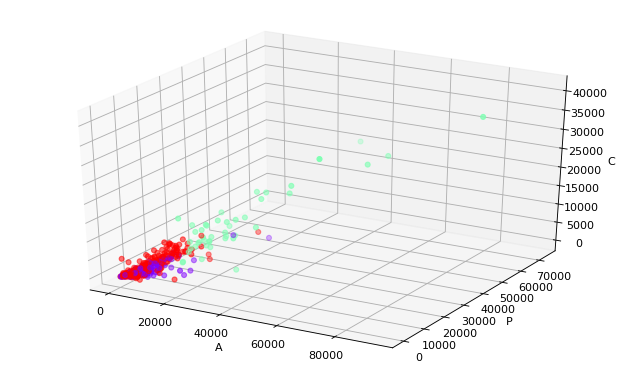

In [119]:
model=AgglomerativeClustering(n_clusters=3)
model.fit(df)
hac_labels=model.labels_

fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes(projection="3d")
ax.scatter3D(df.Grocery,df.Milk,df.Detergents_Paper,c=hac_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
zLabel=ax.set_zlabel('C',linespacing=0.5)
print("Hierarchical Agglomerative Clustering")

Hierarchical Agglomerative Clustering


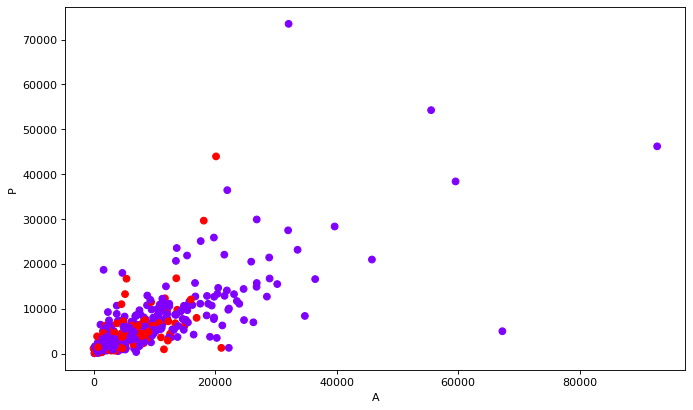

In [123]:
model=AgglomerativeClustering(n_clusters=2)
model.fit(df)
hac_labels=model.labels_

fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes()
ax.scatter(df.Grocery,df.Milk,c=hac_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
print("Hierarchical Agglomerative Clustering")

DBSCAN


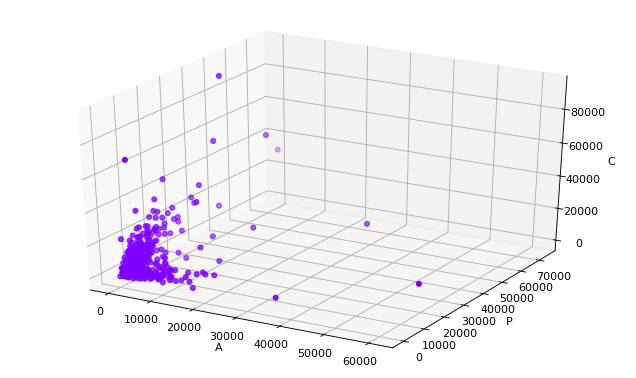

In [126]:
from sklearn.cluster import DBSCAN
model=DBSCAN()
model.fit(df)
dbs_labels=model.labels_


fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes(projection="3d")
ax.scatter3D(df.Frozen,df.Milk,df.Grocery,c=dbs_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
zLabel=ax.set_zlabel('C',linespacing=0.5)
print("DBSCAN")